In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gzip, glob, os, csv
import seaborn as sns

In [3]:
RUN_NAMES = [
             'p40_high_density_strong_effects/', 
             'p40_high_density_weak_effects'
             'p40_low_density_strong_effects',
             'p40_low_density_weak_effects',
            ]

all_runs = [(base_name,
             '/u/home/a/asxue/project-hjp/dotears/data/{}/benchmarks/'.format(base_name),
            ) for base_name in RUN_NAMES]

df = pd.DataFrame(columns=['s', 
                           'h:m:s', 
                           'max_rss', 
                           'max_vms', 
                           'max_uss', 
                           'max_pss', 
                           'io_in', 
                           'io_out', 
                           'mean_load', 
                           'cpu_time', 
                           'method'])

for base_name, benchmark_dir in all_runs:
    methods = [os.path.basename(x) for x in glob.glob(os.path.join(benchmark_dir, '*'))]
    
    for method in methods:
        method_dir = os.path.join(benchmark_dir, method)
        
        experiment_dirs = glob.glob(os.path.join(method_dir, '*'))
        
        for exp_dir in experiment_dirs:
            for dag_dir in glob.glob(os.path.join(exp_dir, '*')):
                for f in glob.glob(os.path.join(dag_dir, '*')):
                    if 'lambda' in f:
                        continue
                    
                    basename = os.path.basename(f)
                    sim_id = basename.split('.')[0][3:]
                    if int(sim_id) >= 10:
                        continue
                        
                    f_df = pd.read_csv(f, delimiter='\t')
                    

                    f_df['method'] = method
                    df.loc[len(df.index), :] = f_df.loc[0]

        

In [4]:
mpl.style.use('ggplot')
# plt.style.use(['science'])

plt.rcParams['lines.linewidth']= 3
plt.rcParams['axes.facecolor']= 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'

plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color']= 'black'

plt.rcParams['xtick.labelsize'] = 28
plt.rcParams['ytick.labelsize'] = 28
plt.rcParams['axes.labelsize'] = 32
plt.rcParams['axes.titlesize'] = 32


plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8


plt.rcParams['text.usetex'] = False

plt.rcParams['axes.labelpad'] = 8
plt.rcParams['axes.linewidth'] = 2

mpl.rc('font', family='sans-serif') 
mpl.rc('font', serif='Helvetica') 

# colormap = ['#77AADD', '#EE8866', '#EEDD88', '#FFAABB', '#99DDFF', '#44BB99', '#BBCC33', '#AAAA00', '#DDDDDD'] #light
colormap = [
    '#59C7EB', 
    '#E0607E',  
    '#0A9086', 
    '#FEA090', 
    '#3E5496', 
    '#EFDC60', 
    '#8E2043', 
    '#9AA0A7', 
    '#077187', 
    'orange',
    'orchid'
] #unikn pal pref

HUE_METHODS = [
    'dotears', 
    'gies', 
    'notears', 
    'sortnregress', 
    'direct-lingam', 
    'igsp', 
    'golem-nv', 
    'golem-ev', 
    'ut-igsp', 
    'dcdi-g',
    'colide-nv'
]
# HUE_METHODS = ['dotears', 'sortnregress', 'notears', 'gies', 'golem-nv', 'igsp', 'direct-lingam', 'golem-ev']
CV_NAME_DICT = {
    'dotears': 'dotears*',
    'gies': 'GIES',
    'notears': 'NO TEARS*',
    'sortnregress': 'sortnregress*',
    'golem-nv': 'GOLEM-NV*',
    'igsp': 'IGSP',
    'direct-lingam': 'DirectLiNGAM',
    'golem-ev': 'GOLEM-EV*',
    'ut-igsp': 'UT-IGSP',
    'dcdi-g': 'DCDI-G',
    'colide-nv': 'CoLiDE-NV*'
}

color_dict = {
    x[0]: x[1] for x in zip(HUE_METHODS, colormap)
}


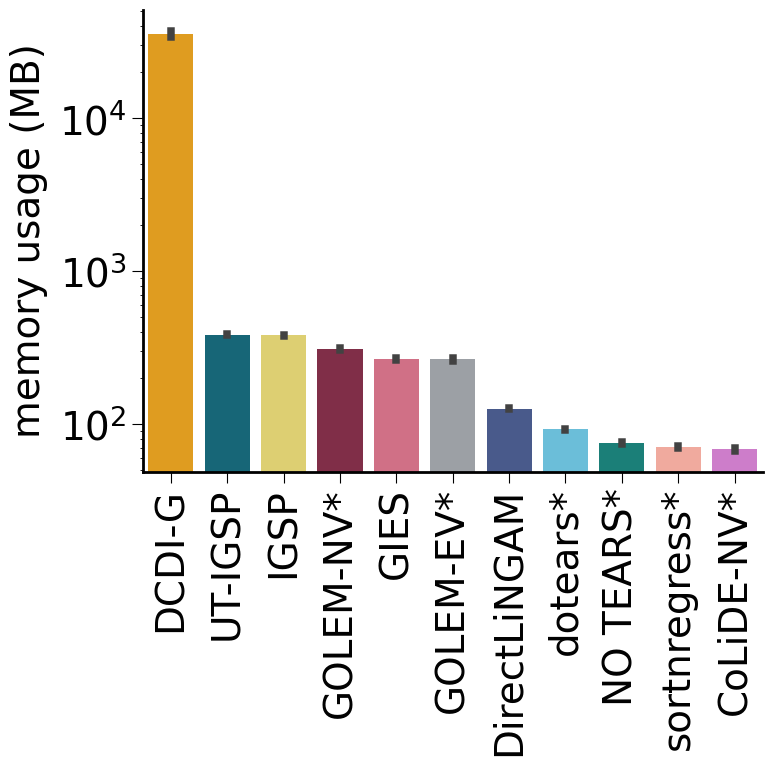

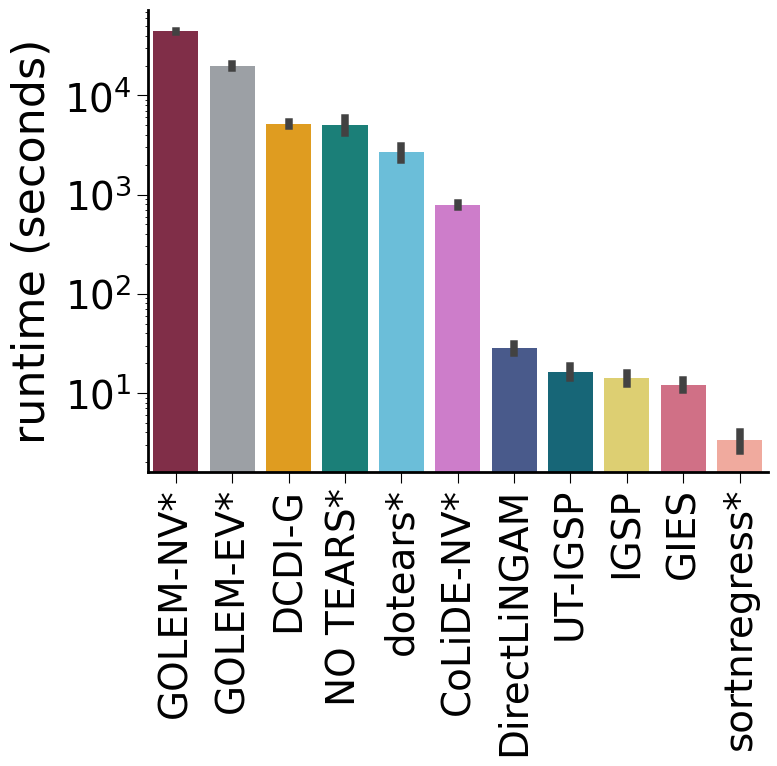

In [5]:
plt.figure(figsize=(8, 6))

ORDERED_METHODS = sorted(HUE_METHODS, key=lambda x: df.loc[df['method'] == x, 'max_uss'].mean())[::-1]
DISPLAY_METHODS = [CV_NAME_DICT[x] for x in ORDERED_METHODS]

sns.barplot(data=df,
            x='method',
            y='max_uss',
            order=ORDERED_METHODS,
            palette=color_dict,
            errorbar=('se', 1),

           )
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel('memory usage (MB)', fontsize=28)
plt.xlabel(None)
ax = plt.gca()
ax.set_xticklabels(DISPLAY_METHODS, rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../figures/benchmarking/memory.png',
            bbox_inches='tight',
              dpi=72)

plt.figure(figsize=(8, 6))
ORDERED_METHODS = sorted(HUE_METHODS, key=lambda x: df.loc[df['method'] == x, 's'].mean())[::-1]
DISPLAY_METHODS = [CV_NAME_DICT[x] for x in ORDERED_METHODS]

sns.barplot(data=df, 
            x='method', 
            y='s',
            order=ORDERED_METHODS,
            palette=color_dict,
            errorbar=('se', 1),

           )
plt.xticks(rotation=90)
plt.xlabel(None)
plt.yscale('log')
plt.ylabel('runtime (seconds)')
ax = plt.gca()
ax.set_xticklabels(DISPLAY_METHODS, rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../figures/benchmarking/runtime.png',
            bbox_inches='tight',
              dpi=72)

In [6]:
ORDERED_METHODS

['golem-nv',
 'golem-ev',
 'dcdi-g',
 'notears',
 'dotears',
 'colide-nv',
 'direct-lingam',
 'ut-igsp',
 'igsp',
 'gies',
 'sortnregress']

In [7]:
df.loc[df['method'] == 'dcdi-g', 'max_uss'].mean() 

35685.02950000001

In [8]:
df.loc[df['method'] == 'dcdi-g', 's'].max() / 3600

2.786888277777778

In [9]:
df

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,method
0,76.8973,0:01:16,137.36,473.04,138.71,138.79,169.71,0.0,23.55,18.3,direct-lingam
1,21.3997,0:00:21,136.78,439.0,135.34,135.45,166.7,0.0,42.38,9.07,direct-lingam
2,105.1698,0:01:45,134.77,438.95,133.33,133.57,166.71,0.0,30.0,31.56,direct-lingam
3,17.5138,0:00:17,134.79,439.0,133.35,133.52,1.25,0.0,79.05,14.08,direct-lingam
4,65.0862,0:01:05,134.76,438.95,133.29,133.53,166.71,0.0,60.93,39.67,direct-lingam
...,...,...,...,...,...,...,...,...,...,...,...
803,746.0177,0:12:26,75.88,461.08,74.66,74.82,42.32,0.87,98.01,731.28,colide-nv
804,773.4368,0:12:53,75.85,461.08,74.66,74.84,7.54,1.07,98.44,761.51,colide-nv
805,781.4445,0:13:01,74.52,459.83,73.3,73.53,102.89,0.66,97.38,760.95,colide-nv
806,799.8689,0:13:19,77.8,461.09,76.57,76.79,104.14,0.56,98.94,791.43,colide-nv
